## Regression using Scikit-Learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# lets build a dictionary where stateName = key, and abbreviation = value 
states_abbrev_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
abbrev_states_dict = {v: k for k, v in states_abbrev_dict.items()}
print abbrev_states_dict.keys()

['Mississippi', 'Northern Mariana Islands', 'Oklahoma', 'Wyoming', 'Minnesota', 'Alaska', 'American Samoa', 'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana', 'Texas', 'Tennessee', 'Iowa', 'Wisconsin', 'Arizona', 'Michigan', 'Kansas', 'Utah', 'Virginia', 'Oregon', 'Connecticut', 'District of Columbia', 'New Hampshire', 'Idaho', 'West Virginia', 'South Carolina', 'California', 'Massachusetts', 'Vermont', 'Georgia', 'North Dakota', 'Pennsylvania', 'Puerto Rico', 'Florida', 'Hawaii', 'Kentucky', 'Rhode Island', 'Nebraska', 'Missouri', 'Ohio', 'Alabama', 'Illinois', 'Virgin Islands', 'South Dakota', 'Colorado', 'New Jersey', 'National', 'Washington', 'North Carolina', 'Maine', 'New York', 'Montana', 'Nevada', 'Delaware', 'Guam']


### First, a bit about scikit-learn

The structure of scikit-learn:

Some of the following text is taken from the scikit-learn API paper: http://arxiv.org/pdf/1309.0238v1.pdf

>All objects within scikit-learn share a uniform common basic API consisting of
three complementary interfaces: an estimator interface for building and ﬁtting
models, a predictor interface for making predictions and a transformer interface
for converting data.

>The estimator interface is at the core of the library. It deﬁnes instantiation
mechanisms of objects and exposes a ***fit*** method for learning a model from
training data. All supervised and unsupervised learning algorithms (e.g., for
classiﬁcation, regression or clustering) are oﬀered as objects implementing this
interface. Machine learning tasks like feature extraction, feature selection or
dimensionality reduction are also provided as estimators.



An example along these lines:

    model = LinearRegression()
    model.fit(X_train, y_train)
   

>The **predictor** interface extends the notion of an estimator by adding a predict
method that takes an array `X_test` and produces predictions for `X_test`, based on
the learned parameters of the estimator. In the case of
supervised learning estimators, this method typically returns the predicted values computed by the model. 

    model.predict(X_test)

### PART 1: Linear Regression 

Lets consider a linear regression problem. Let us load the census data set.

In [3]:
census_data = pd.read_csv("./data/census_demographics.csv")
census_data.head()

,state,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,older_pop,per_older,per_vote
0,ALABAMA,26.5,4.0,66.8,81.4,21.7,22984,42081,94.4,3.001712e+06,672383.600,0.140,0.625
1,ALASKA,3.6,5.8,63.7,90.7,27.0,30726,66521,1.2,4.755484e+05,58540.158,0.081,0.658
2,ARIZONA,4.5,30.1,57.4,85.0,26.3,25680,50448,56.3,3.934881e+06,920515.710,0.142,0.607
3,ARKANSAS,15.6,6.6,74.2,81.9,19.1,21274,39267,56.0,1.798043e+06,428944.934,0.146,0.612
4,CALIFORNIA,6.6,38.1,39.7,80.7,30.1,29188,60883,239.1,2.400975e+07,4409953.704,0.117,0.637


Clean the data set, and have it indexed by the state abbrev.

In [4]:
def capitalize(s):
    s = s.title()
    return s


census_data["state"] = census_data.state.map(capitalize) # for each item in list, apply function 'capitalize' 

# replace state name with its abbrevation using the dictionary 'abbrev_states_dict'

census_data['state']=census_data['state'].replace(abbrev_states_dict)
census_data.set_index("state", inplace=True)
census_data.head()

,per_black,per_hisp,per_white,educ_hs,educ_coll,average_income,median_income,pop_density,vote_pop,older_pop,per_older,per_vote
state,,,,,,,,,,,,
AL,26.5,4.0,66.8,81.4,21.7,22984,42081,94.4,3.001712e+06,672383.600,0.140,0.625
AK,3.6,5.8,63.7,90.7,27.0,30726,66521,1.2,4.755484e+05,58540.158,0.081,0.658
AZ,4.5,30.1,57.4,85.0,26.3,25680,50448,56.3,3.934881e+06,920515.710,0.142,0.607
AR,15.6,6.6,74.2,81.9,19.1,21274,39267,56.0,1.798043e+06,428944.934,0.146,0.612
CA,6.6,38.1,39.7,80.7,30.1,29188,60883,239.1,2.400975e+07,4409953.704,0.117,0.637


We use a scatterplot matrix (refered to as SPLOM) to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.

In [19]:
# from census_data, extract subset of columns of interest 

smaller_frame=census_data[['educ_coll', 'average_income', 'per_vote']]

from pandas.tools.plotting import scatter_matrix

axeslist=scatter_matrix(smaller_frame, alpha=0.8, c="b", figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

Notice how `average_income` seems to have a strong correlation with `educ_coll`. Lets try and regress the former against the latter. One might expect that the average income is higher in states which have "better" education systems and send more students to college. First lets confirm our intuition by seeing the co-relations.

In [20]:
smaller_frame.corr()

,educ_coll,average_income,per_vote
educ_coll,1.000000,0.894066,0.670977
average_income,0.894066,1.000000,0.732703
per_vote,0.670977,0.732703,1.000000


We carry out the regression, first standardizing our variables ( subtract the mean and divide by the standard deviation). This is not necessary, but its a good idea anyway. Since `scikit-learn` wants a `n_sample` rows times `n_features` matrix, we need to reshape the `x` variable. We store both an `_vec` variable, which is easier to plot with, as well as the reshaped variable. 

In [21]:
from sklearn.linear_model import LinearRegression

df_nonNormalized =smaller_frame[['educ_coll', 'average_income']].values
df_normalized=(df_nonNormalized - df_nonNormalized.mean(axis=0))/df_nonNormalized.std(axis=0)

educ_coll_std_vec=df_normalized[:,0]
educ_coll_std=educ_coll_std_vec.reshape(-1,1)

average_income_std_vec=df_normalized[:,1]
average_income_std=average_income_std_vec.reshape(-1,1)



In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(educ_coll_std, average_income_std_vec)

We use the training set for the fit, and find what our predictions ought to be on both the training and test set.

In [23]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

# Perform prediction on the test data
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)


trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()



The "slope" parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute.

The intercept_ attribute is alwas a single float number, while the coef_ attribute is a NumPy array with one entry per input feature. As we only have a single input feature, we have only a single entry. 

In [24]:
print "Coeff:", model.coef_
print "Intercept:",  model.intercept_

Coeff: [ 0.8351184]
Intercept: -0.0389260611515


We plot the scatter against the fit for both training and test data.

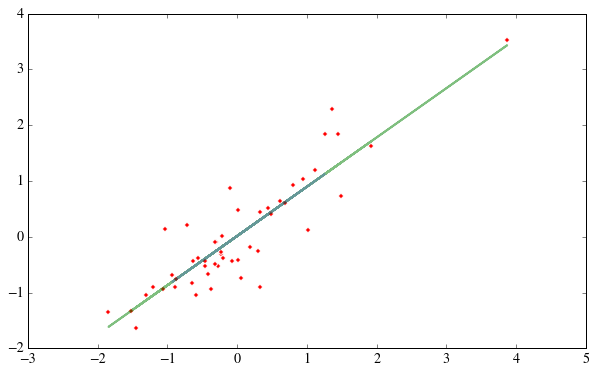

In [90]:
plt.scatter(educ_coll_std_vec, average_income_std_vec,c='r') # will plot on same figure 
plt.plot(trains, predicted_train, c='g', alpha=0.5)  # line 
plt.plot(tests, predicted_test, c='b', alpha=0.2)

We then look at the residuals, again on both sets.

In [25]:
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])

We ask scikit-learn to spit out the $R^2$, which provides the accuracy of the model on the training and testing dataset. If we find the $R^2$ is high for the training dataset, but low for the testing dataset, then that implies that the model was overfitting.... esentially, learning the patterns on the training dataset and not generalizing well on other datatsets. 

In [17]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.81057859819056099, 0.74693264409200921)

TODO: Try to reapply linear regression on a larger portion of the dataset. Recall, we only considered the features 'eduo_call' and 'average_income'.

